In [1]:
from google.colab import files

In [2]:
files.upload()

Saving BitCoin.csv to BitCoin (1).csv


{'BitCoin.csv': b'Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd\n2/17/2010,0,2043200,0,0,0,0.000234776,0,1,0,2.92E-05,2.527738215,0,0,31.78102218,0,241,244,41240,244,244,65173.13,36500,0\n2/18/2010,0,2054650,0,0,0,0.000240913,0,1,0,2.88E-05,2.527738215,0,0,154.4638015,0,234,235,41475,235,235,18911.74,7413,0\n2/19/2010,0,2063600,0,0,0,0.000227749,0,1,0,2.25E-05,2.527738215,0,0,1278.516635,0,185,183,41658,183,183,9749.98,700,0\n2/20/2010,0,2074700,0,0,0,0.000218369,0,1,0,2.79E-05,2.52

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [4]:
df=pd.read_csv('BitCoin.csv')

In [5]:
df

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.00000,2043200.0,0.000000e+00,0.000000e+00,0.0000,0.000235,0,1.000000,0.000,2.920000e-05,2.527738e+00,0.00,0.000000,31.781022,0.000000,241,244,41240,244,244,65173.130,36500.0000,0.000000e+00
1,2/18/2010,0.00000,2054650.0,0.000000e+00,0.000000e+00,0.0000,0.000241,0,1.000000,0.000,2.880000e-05,2.527738e+00,0.00,0.000000,154.463801,0.000000,234,235,41475,235,235,18911.740,7413.0000,0.000000e+00
2,2/19/2010,0.00000,2063600.0,0.000000e+00,0.000000e+00,0.0000,0.000228,0,1.000000,0.000,2.250000e-05,2.527738e+00,0.00,0.000000,1278.516635,0.000000,185,183,41658,183,183,9749.980,700.0000,0.000000e+00
3,2/20/2010,0.00000,2074700.0,0.000000e+00,0.000000e+00,0.0000,0.000218,0,1.000000,0.000,2.790000e-05,2.527738e+00,0.00,0.000000,22186.687990,0.000000,224,224,41882,224,224,11150.030,50.0000,0.000000e+00
4,2/21/2010,0.00000,2085400.0,0.000000e+00,0.000000e+00,0.0000,0.000234,0,1.000000,0.000,2.690000e-05,2.527738e+00,0.00,0.000000,689.179876,0.000000,218,218,42100,218,218,12266.830,1553.0000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,1/27/2018,11524.77667,16830312.5,1.940000e+11,7.630946e+08,153844.0759,1.038548,0,1232.980892,11.600,2.031575e+07,2.600000e+12,23654604.11,168.254694,1.778601,126.855696,541699,193578,295802277,188058,126082,1363301.068,119799.4611,1.380662e+09
2902,1/28/2018,11765.71000,16832287.5,1.980000e+11,7.381042e+08,154006.9753,1.031009,0,1350.924051,11.950,2.044515e+07,2.600000e+12,24143236.92,155.344856,1.302242,117.430262,492738,213446,296015723,205967,137919,3128906.096,163590.5694,1.924759e+09
2903,1/29/2018,11212.65500,16834137.5,1.890000e+11,6.111197e+08,154157.6651,1.018174,0,1568.756757,12.275,1.915115e+07,2.600000e+12,21651636.81,145.751129,1.243012,96.382352,532630,232176,296247899,225983,155772,1941048.853,160557.7065,1.800278e+09
2904,1/30/2018,10184.06167,16836225.0,1.710000e+11,1.266284e+09,154322.5790,0.987509,0,1416.820359,11.075,2.160975e+07,2.600000e+12,22124873.97,160.300904,1.301143,96.749249,531440,236609,296484508,230310,158259,2359671.266,172755.8071,1.759356e+09


In [6]:
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [7]:
for columns in df.columns:
  ave=0
  med=0
  if(df[columns].isnull().sum()==0):
    continue
  else:
    try:
      ave=df[columns].mean()
      med=df[columns].median()
    except Exception as e:
      ;
    if(ave!=0):
      df[columns]=df[columns].fillna(df[columns].mean())
    elif(med!=0):
      df[columns]=df[columns].fillna(df[columns].median())
    else:
      df[columns]=df[columns].fillna(0)

In [8]:
df.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

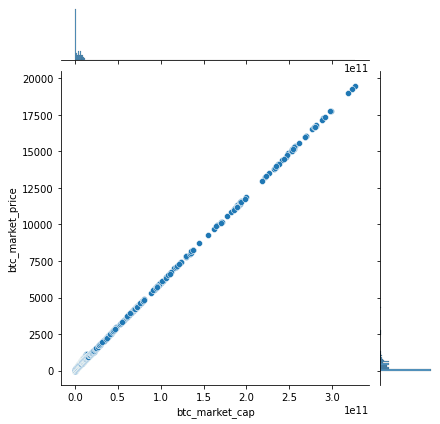

In [9]:
sns.jointplot(data=df,x='btc_market_cap', y='btc_market_price',kind='scatter')

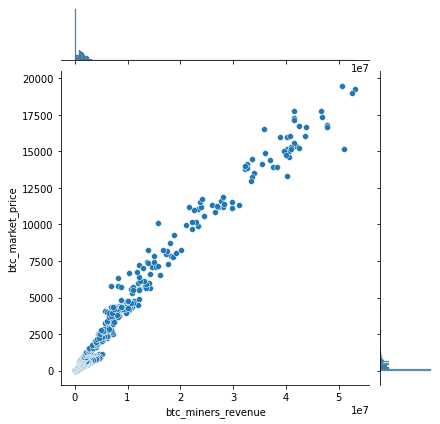

In [10]:
sns.jointplot(data=df,x='btc_miners_revenue', y='btc_market_price',kind='scatter')

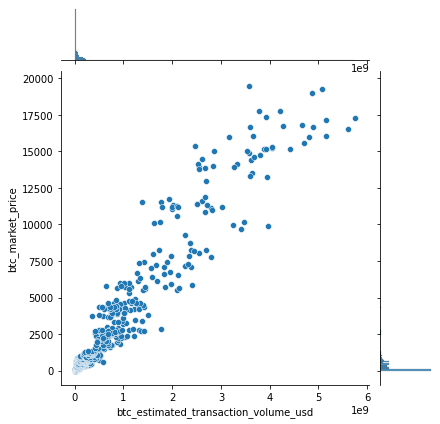

In [11]:
sns.jointplot(data=df,x='btc_estimated_transaction_volume_usd', y='btc_market_price',kind='scatter')

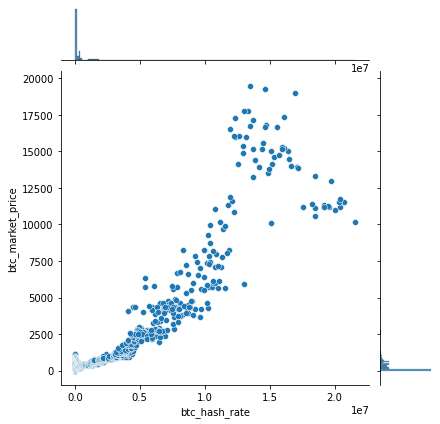

In [12]:
sns.jointplot(data=df,x='btc_hash_rate', y='btc_market_price',kind='scatter')

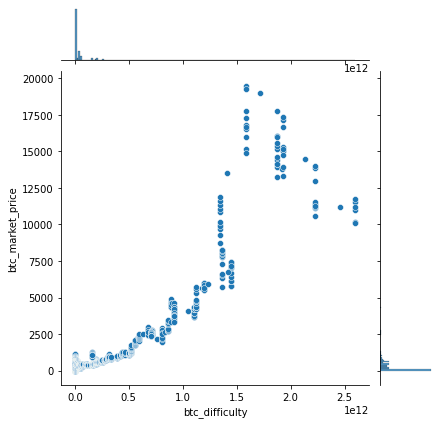

In [13]:
sns.jointplot(data=df,x='btc_difficulty', y='btc_market_price',kind='scatter')

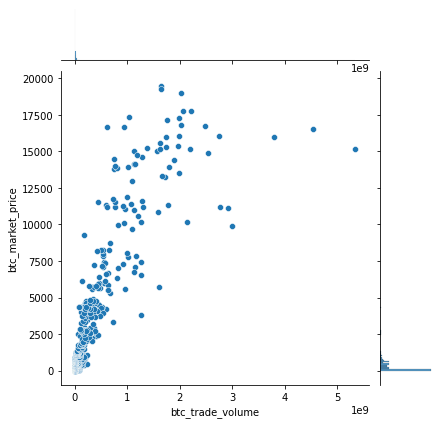

In [14]:
sns.jointplot(data=df,x='btc_trade_volume', y='btc_market_price',kind='scatter')

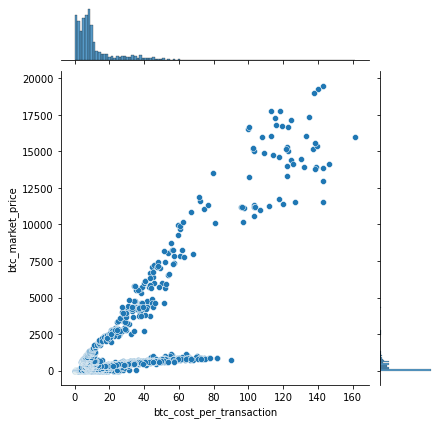

In [15]:
sns.jointplot(data=df,x='btc_cost_per_transaction', y='btc_market_price',kind='scatter')

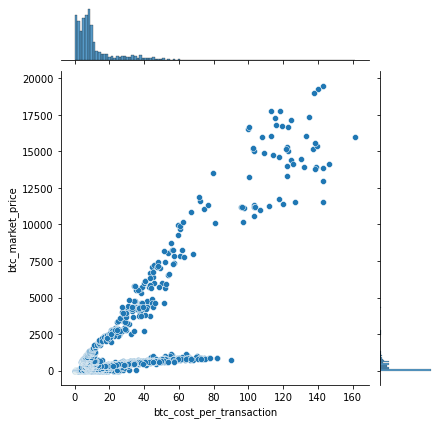

In [16]:
sns.jointplot(data=df,x='btc_cost_per_transaction', y='btc_market_price',kind='scatter')

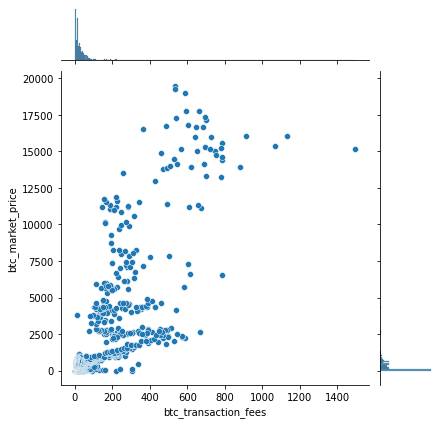

In [17]:
sns.jointplot(data=df,x='btc_transaction_fees', y='btc_market_price',kind='scatter')

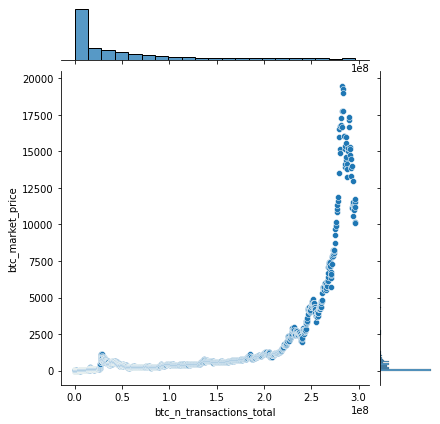

In [18]:
sns.jointplot(data=df,x='btc_n_transactions_total', y='btc_market_price',kind='scatter')

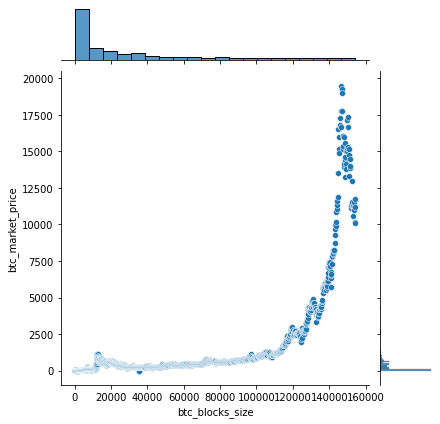

In [19]:
sns.jointplot(data=df,x='btc_blocks_size', y='btc_market_price',kind='scatter')

In [20]:
df[df.columns[1:]].corr()['btc_market_price'][:].sort_values(ascending=False)

btc_market_price                                       1.000000
btc_market_cap                                         0.999783
btc_miners_revenue                                     0.986732
btc_estimated_transaction_volume_usd                   0.968308
btc_hash_rate                                          0.920876
btc_difficulty                                         0.916913
btc_trade_volume                                       0.868608
btc_cost_per_transaction                               0.815507
btc_transaction_fees                                   0.806568
btc_n_transactions_total                               0.680048
btc_blocks_size                                        0.674059
btc_n_unique_addresses                                 0.663917
btc_n_transactions                                     0.569603
btc_n_transactions_excluding_chains_longer_than_100    0.567281
btc_n_transactions_excluding_popular                   0.558416
btc_n_transactions_per_block            

(23.5, -0.5)

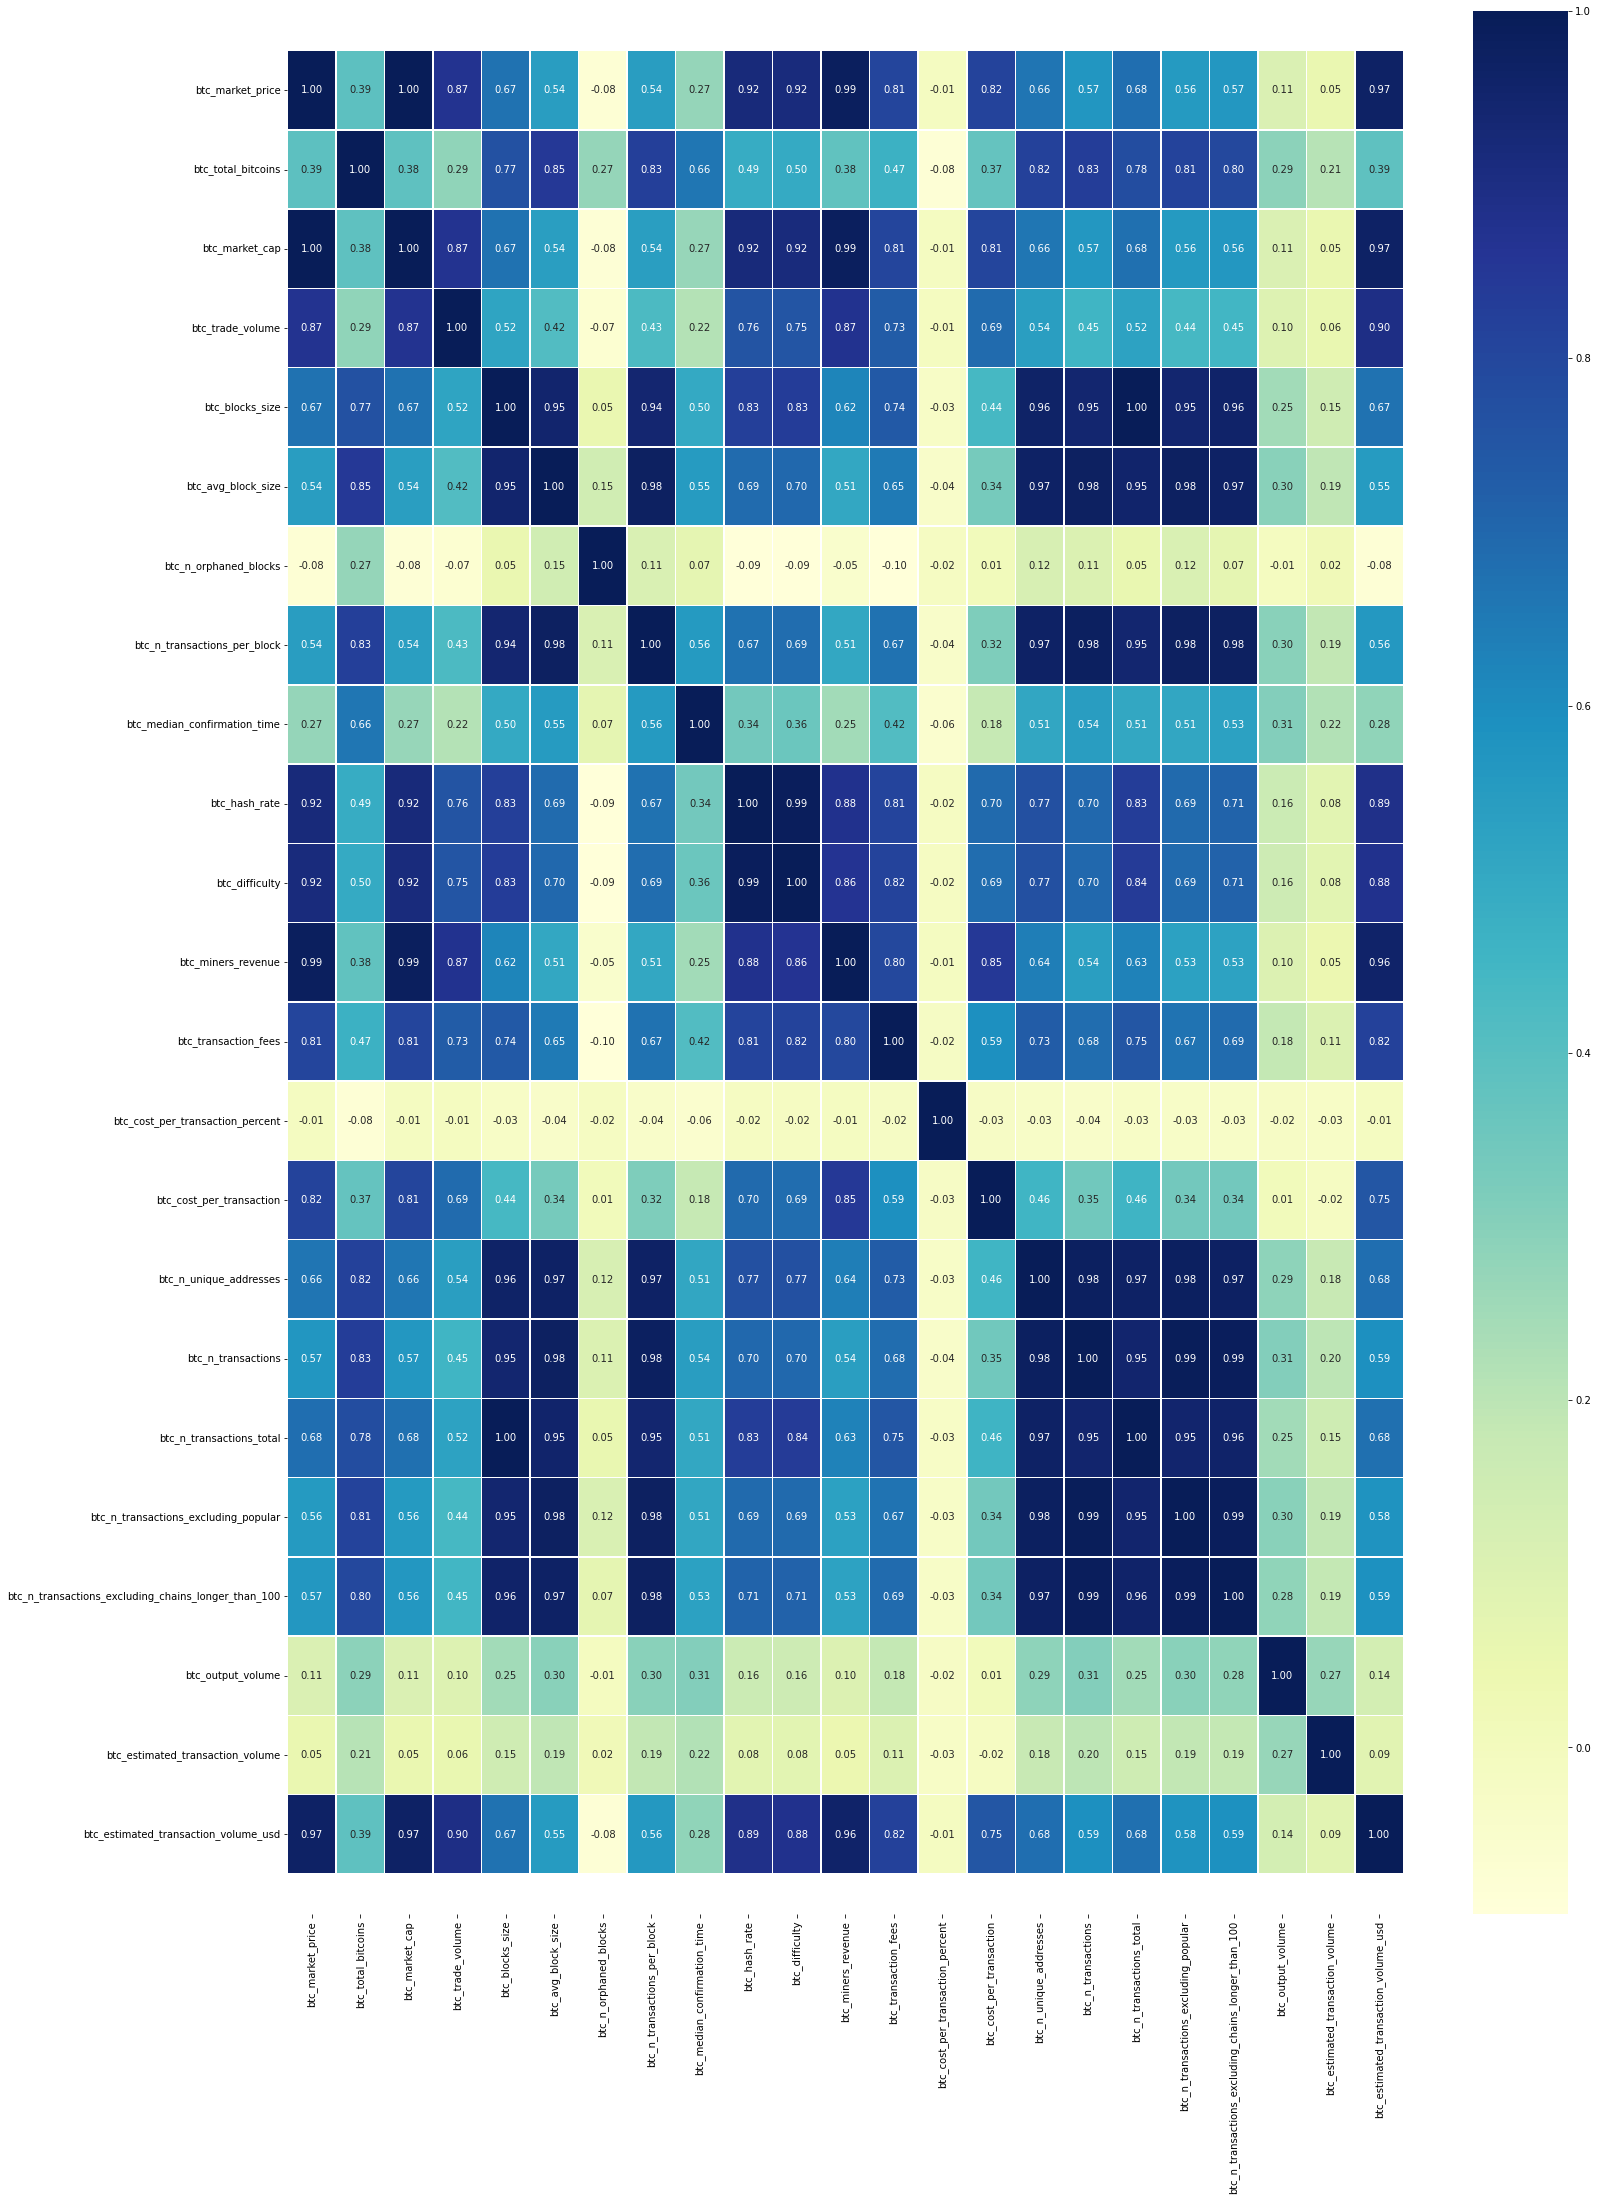

In [21]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(25, 35))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [22]:
df1=df[['btc_market_cap', 'btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent','btc_market_price']]

In [23]:
x=df1.drop(['btc_market_price'],axis=1)
y=df1['btc_market_price']

In [24]:
Scaler=StandardScaler()
Scaled_x=Scaler.fit_transform(x)

In [25]:
Reg=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=125)
Tree=DecisionTreeRegressor()
Forest=RandomForestRegressor(n_estimators=10)
Support=SVR(gamma='auto')

In [26]:
Algo=[Reg,KNN,Tree,Forest,Support]
Algorithms=["Reg","KNN","Tree","Forest","Support"]

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(Scaled_x,y,test_size=0.2,random_state=1)

In [28]:
Scores=[]
msr=[]
mar=[]
for A in Algo:
  A.fit(xtrain,ytrain)
  pred=A.predict(xtest)
  Scores.append(r2_score(ytest,pred))
  msr.append(mean_squared_error(ytest,pred))
  mar.append(mean_absolute_error(ytest,pred))

In [29]:
Scores=pd.DataFrame(Scores,columns=['r2_score'])
msr=pd.DataFrame(msr,columns=['Mean Squared Error'])

In [30]:
mar=pd.DataFrame(mar,columns=['Mean Absolute Error'])
Algorithms=pd.DataFrame(Algorithms,columns=['Algorithms'])
Table=pd.concat([Algorithms,Scores],axis=1)
Table=pd.concat([Table,msr],axis=1)
Table=pd.concat([Table,mar],axis=1)

In [31]:
Table

,Algorithms,r2_score,Mean Squared Error,Mean Absolute Error
0,Reg,0.999883,4.709639e+02,13.248992
1,KNN,0.861325,5.595584e+05,159.500463
2,Tree,0.999694,1.236526e+03,9.407348
3,Forest,0.999365,2.560975e+03,9.617054
4,Support,0.028347,3.920643e+06,514.025866


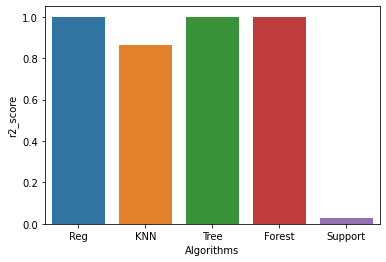

In [32]:
sns.barplot(x='Algorithms',y='r2_score',data=Table)

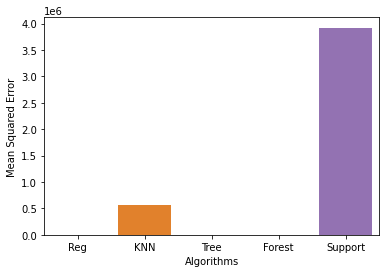

In [33]:
sns.barplot(x='Algorithms',y='Mean Squared Error',data=Table)

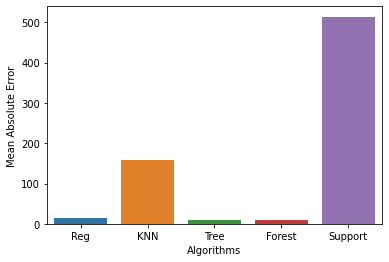

In [34]:
sns.barplot(x='Algorithms',y='Mean Absolute Error',data=Table)

Text(0.5, 1.0, 'Plot from dataset')

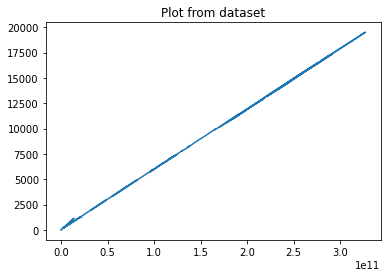

In [35]:
plt.plot(df1['btc_market_cap'],df['btc_market_price'])
plt.title("Plot from dataset")

Text(0.5, 1.0, 'Plot from prediction')

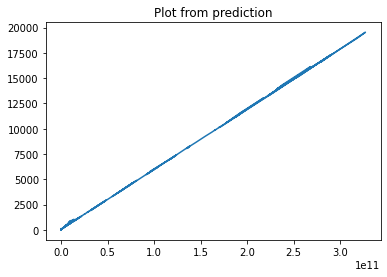

In [36]:
plt.plot(df1['btc_market_cap'],Reg.predict(Scaled_x))
plt.title("Plot from prediction")

In [37]:
Reg.fit(xtrain,ytrain)

LinearRegression()

In [38]:
Reg.score(xtest,ytest)

0.9998832809830944

In [39]:
Reg.predict(xtest[:1])

array([591.45000474])

In [40]:
ytest[:1]

1482    621.99
Name: btc_market_price, dtype: float64

In [41]:
len(xtest)

582

In [42]:
len(xtrain)

2324

In [43]:
ytest=list(ytest)

In [44]:
Labels=pd.DataFrame(ytest,columns=['Orginal Output'])
Pred=pd.DataFrame(Reg.predict(xtest),columns=["Predicted Output"])
Comparison=pd.concat([Labels,Pred],axis=1)

In [45]:
Comparison

,Orginal Output,Predicted Output
0,621.990000,591.450005
1,160.099700,145.250234
2,2446.142414,2429.889525
3,1.701000,11.414641
4,447.170000,462.141056
...,...,...
577,31.500000,101.262250
578,483.650000,462.242788
579,587.454237,605.789396
580,96.634980,94.553654
